## Expand Gene identities

In [1]:
# %reset
import pandas as pd
location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/3.Pararge_aegeria"

gene_table = pd.read_csv(f"{location}/2.Annotation_busco_prediction/full_table.tsv", sep= "\t")
gene_table

,Busco_id,Status,Sequence,Gene_Start,Gene_End,Strand,Score,Length,OrthoDB url,Description
0,0at7088,Complete,NC_053203.1,8019305.0,8139590.0,+,17291.7,8018.0,https://v10-1.orthodb.org/?query=0at7088,Immunoglobulin
1,1at7088,Complete,NC_053208.1,481908.0,386736.0,-,9114.1,4245.0,https://v10-1.orthodb.org/?query=1at7088,Immunoglobulin
2,2at7088,Complete,NC_053185.1,10195956.0,10290906.0,+,12370.1,6923.0,https://v10-1.orthodb.org/?query=2at7088,EGF-like calcium-binding domain
3,3at7088,Complete,NC_053190.1,17547787.0,17672542.0,+,10539.6,5416.0,https://v10-1.orthodb.org/?query=3at7088,Spectrin repeat
4,4at7088,Complete,NC_053180.1,8701761.0,8813024.0,+,13769.4,6908.0,https://v10-1.orthodb.org/?query=4at7088,Spectrin repeat
...,...,...,...,...,...,...,...,...,...,...
5301,16855at7088,Complete,NC_053187.1,11652756.0,11652038.0,-,138.7,97.0,https://v10-1.orthodb.org/?query=16855at7088,"AT hook, DNA-binding motif"
5302,16938at7088,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5303,16982at7088,Complete,NC_053187.1,18607357.0,18608795.0,+,112.3,117.0,https://v10-1.orthodb.org/?query=16982at7088,uncharacterized protein LOC110991765
5304,cycle,Complete,NC_053208.1,26655097.0,26713847.0,-,139.8,124.0,https://v10-1.orthodb.org/?query=16982at7088,cycle


In [2]:
output = "Busco_id\tChromosome\tGene_Start\tGene_End"
for row_details in gene_table.itertuples():
    if not(pd.isna(row_details.Sequence)):
        if row_details.Gene_Start > row_details.Gene_End:
            gene_start = row_details.Gene_End
            gene_end = row_details.Gene_Start
        else:
            gene_start = row_details.Gene_Start
            gene_end = row_details.Gene_End
        try:
            output += f"\n{row_details.Busco_id}\t{row_details.Sequence}\t{int(max(0,gene_start-10000))}\t{int(gene_end+10000)}"
        except:
            print(row_details.Busco_id, gene_end+20000)
            assert False
    # print(row_details)
    # break
with open(f"{location}/2.Annotation_busco_prediction/padded_10k.tsv", 'w') as out_file:
    out_file.write(output)

In [3]:
fst_dictionary = {}
# with open(f"{location}/1.FST_peaks_from_chris/two_pool_1%_0.149_5kb_merged.fst",'r') as fst_file:
with open(f"{location}/1.FST_peaks_from_chris/two_pool_5%_0.076_5kb_merged.fst",'r') as fst_file:
    for fst_lines in fst_file.readlines()[1:]:
        line_split = fst_lines.strip().split(",")
        fst_dictionary.setdefault(line_split[0],[])
        
        fst_dictionary[line_split[0]].append([int(line_split[1]), int(line_split[2])])
        
print(fst_dictionary)


{'NC_053180.1': [[451001, 452000], [457001, 458000], [478001, 479000], [691001, 692000], [792001, 793000], [929001, 930000], [1013001, 1014000], [1143001, 1144000], [1174001, 1175000], [1352001, 1353000], [1359001, 1360000], [1365001, 1373000], [1409001, 1410000], [1437001, 1438000], [1660001, 1671000], [1692001, 1693000], [1702001, 1709000], [1762001, 1763000], [1777001, 1782000], [1793001, 1794000], [2102001, 2103000], [2112001, 2120000], [2125001, 2131000], [2155001, 2156000], [2169001, 2176000], [2214001, 2215000], [2487001, 2494000], [2500001, 2501000], [2511001, 2516000], [2535001, 2537000], [2550001, 2551000], [2573001, 2584000], [2674001, 2677000], [2686001, 2689000], [2767001, 2768000], [2822001, 2826000], [2876001, 2880000], [2969001, 2986000], [2991001, 3009000], [3014001, 3025000], [3035001, 3038000], [3043001, 3046000], [3114001, 3116000], [3124001, 3125000], [3146001, 3147000], [3162001, 3172000], [3202001, 3203000], [3239001, 3240000], [3251001, 3256000], [3269001, 32700

In [4]:
gene_loc_dic = {}
with open(f"{location}/2.Annotation_busco_prediction/padded_10k.tsv", 'r') as gene_loc_file:
    for gene_line in gene_loc_file.readlines()[1:]:
        line_split = gene_line.strip().split("\t")
        gene_loc_dic[line_split[0]] = [line_split[1],line_split[2],line_split[3]]
print(gene_loc_dic)
        

{'0at7088': ['NC_053203.1', '8009305', '8149590'], '1at7088': ['NC_053208.1', '376736', '491908'], '2at7088': ['NC_053185.1', '10185956', '10300906'], '3at7088': ['NC_053190.1', '17537787', '17682542'], '4at7088': ['NC_053180.1', '8691761', '8823024'], '6at7088': ['NC_053190.1', '8497800', '8539077'], '11at7088': ['NC_053200.1', '11604116', '11711424'], '13at7088': ['NC_053181.1', '17299943', '17349297'], '18at7088': ['NC_053200.1', '7058754', '7116085'], '20at7088': ['NC_053188.1', '9011703', '9087183'], '25at7088': ['NC_053182.1', '8289915', '8325591'], '26at7088': ['NC_053182.1', '7034017', '7095805'], '27at7088': ['NC_053208.1', '9267644', '9382671'], '28at7088': ['NC_053182.1', '5460858', '5521928'], '31at7088': ['NC_053203.1', '4531920', '4593213'], '33at7088': ['NC_053182.1', '14641303', '14700591'], '34at7088': ['NC_053182.1', '1765730', '1839160'], '36at7088': ['NC_053201.1', '6844860', '6883941'], '37at7088': ['NC_053208.1', '12661313', '12729874'], '38at7088': ['NC_053203.1'

In [5]:
# output_rho_set_location = "Gene,Chromosome,Location"
# with open(f"{location}/3.Rho_set_genes/Rho_set.txt", 'r') as rho_set_file:
#     for lines in rho_set_file.readlines():
#         rho_gene_name = lines.strip().split("\t")[0]
#         # print(lines.strip(),gene_loc_dic[lines.strip()])
#         # print(rho_gene_name)
#         chromosome,start,end = gene_loc_dic[rho_gene_name]
#         # print(chromosome,start,end)
#         output_rho_set_location +=  f"\n{rho_gene_name},{chromosome},{start}"

# # print(output_rho_set_location)
# with open(f"{location}/3.Rho_set_genes/Rho_set_location.csv", 'w') as rho_out_file:
#     rho_out_file.write(output_rho_set_location)
       

In [6]:
intersecting_genes = []
with open(f"{location}/3.Rho_set_genes/Rho_set_cluster.txt", 'r') as rho_set_file:
    for rho_set_count,lines in enumerate(rho_set_file.readlines()):
        rho_gene_name = lines.strip().split("\t")[0]
        # print(lines.strip(),gene_loc_dic[lines.strip()])
        try:
            chromosome,start,end = gene_loc_dic[rho_gene_name]
        except:
            print(rho_gene_name, "missing")
        # print(chromosome,start,end)
        for sections in (fst_dictionary[chromosome]):
            # print(sections)
            if ((int(start) >= sections[0] and int(start) <= sections[1]) or (int(end) >= sections[0] and int(end) <= sections[1])) or ((sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))):
                # print(sections)
                print(lines, end = "")
                intersecting_genes.append(rho_gene_name)
                break
            # elif (sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))
        # break
print("\n",len(intersecting_genes), rho_set_count, len(set((intersecting_genes))))
final_gene_count = len(set(intersecting_genes))

5423at7088
3362at7088
13002at7088
2036at7088
12705at7088
6031at7088
2453at7088
3104at7088
2032at7088
13986at7088
3016at7088
12504at7088
1003at7088
4317at7088
9985at7088
5884at7088
1846at7088
3126at7088
4021at7088
7060at7088
4480at7088
190at7088
2905at7088
1947at7088
5650at7088
1300at7088
3363at7088
496at7088
8559at7088
821at7088
9603at7088
5767at7088
3127at7088
721at7088
717at7088
9682at7088
13075at7088
8375at7088
14598at7088
4266at7088
1709at7088
3689at7088
3667at7088
3284at7088 missing
2936at7088
2906at7088
4595at7088
14391at7088
4631at7088
12090at7088
7622at7088
2547at7088
14339at7088
13737at7088
8222at7088
2031at7088
1637at7088
4935at7088
10163at7088
10101at7088
10728at7088
10571at7088
2201at7088
12445at7088
12510at7088
2938at7088
5679at7088
2939at7088
4323at7088
5486at7088
4119at7088
12212at7088
10601at7088
3162at7088
1144at7088
1628at7088
2813at7088
5969at7088
11619at7088
7044at7088
4799at7088
14433at7088
6173at7088
4078at7088
cry1a missing
cry1a
11368at7088
1076at7088
cycle
1319

In [7]:
for intersecting_gene_name in intersecting_genes:
    print(intersecting_gene_name)

print(len(intersecting_genes),len(set(intersecting_genes)))
intersecting_genes = list(set(intersecting_genes))

5423at7088
3362at7088
13002at7088
2036at7088
12705at7088
6031at7088
2453at7088
3104at7088
2032at7088
13986at7088
3016at7088
12504at7088
1003at7088
4317at7088
9985at7088
5884at7088
1846at7088
3126at7088
4021at7088
7060at7088
4480at7088
190at7088
2905at7088
1947at7088
5650at7088
1300at7088
3363at7088
496at7088
8559at7088
821at7088
9603at7088
5767at7088
3127at7088
721at7088
717at7088
9682at7088
13075at7088
8375at7088
14598at7088
4266at7088
1709at7088
3689at7088
3667at7088
2936at7088
2906at7088
4595at7088
14391at7088
4631at7088
12090at7088
7622at7088
2547at7088
14339at7088
13737at7088
8222at7088
2031at7088
1637at7088
4935at7088
10163at7088
10101at7088
10728at7088
10571at7088
2201at7088
12445at7088
12510at7088
2938at7088
5679at7088
2939at7088
4323at7088
5486at7088
4119at7088
12212at7088
10601at7088
3162at7088
1144at7088
1628at7088
2813at7088
5969at7088
11619at7088
7044at7088
4799at7088
14433at7088
6173at7088
4078at7088
cry1a
11368at7088
1076at7088
cycle
1319at7088
11115at7088
10186at7088
17

In [8]:
gene_anno_dic = {}
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/19.Evolutionary_rate_co-variation(ERC)/2.Two_state/correlation_2_with_annotation.csv", 'r') as cor_file:
    for lines in cor_file.readlines()[1:]:
        gene_name = lines.split(",")[0].split("_")[0][1:]
        anno_name = lines.split(",")[-1].replace('"', '')
        gene_anno_dic[gene_name]= anno_name.strip()

instersecting_genes_output = ""
for intersecting_gene_name in intersecting_genes:
    if intersecting_gene_name in gene_anno_dic:
        instersecting_genes_output += intersecting_gene_name+","+gene_anno_dic[intersecting_gene_name] + "\n"
    else:
        instersecting_genes_output += intersecting_gene_name+","+intersecting_gene_name + "\n"
# print(intersecting_genes)
with open(f"{location}/4.Intersections_test/intersection_set.txt", 'w') as out_file:
    out_file.write(instersecting_genes_output)

In [9]:
instersecting_genes_output = "geneid\n"+"\n".join(set(intersecting_genes))
with open(f"{location}/4.Intersections_test/1.For GSEA/1.Rho Set/intersection_set.txt", 'w') as out_file:
    out_file.write(instersecting_genes_output)

In [10]:
busco_gene_list = []
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/0.Gene_id_list/Busco_gene_id.txt",'r') as busco_gene_list_file:
    for lines in busco_gene_list_file:
        busco_gene_list.append(lines.strip())
print(len(busco_gene_list))

4564


In [11]:
# rho_set_size = rho_set_count
# import random
# intersecting_genes_length_list = []
# for i in range(1000):
#     print(i, end = ' ')
#     test_gene_list = random.sample(busco_gene_list, rho_set_size)
#     # print(len(test_gene_list), test_gene_list)
#     intersecting_genes = []
#     for gene_name in test_gene_list:
#         try:
#             chromosome,start,end = gene_loc_dic[gene_name]
#         except:
#             print(gene_name, "missing")
#             pass
#             # break
#         # print(chromosome,start,end)
#         if chromosome in fst_dictionary:
#             for sections in (fst_dictionary[chromosome]):
#                 # print(sections)
#                 if ((int(start) >= sections[0] and int(start) <= sections[1]) or (int(end) >= sections[0] and int(end) <= sections[1])) or ((sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))):
#                     # print(sections)
#                     # print(gene_name,chromosome,start,end)
#                     intersecting_genes.append(gene_name)
#                     break
#                     # elif (sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))
#                 # break
#         else:
#             print(chromosome, "missing")
#     intersecting_genes_length_list.append(len(intersecting_genes))
# print(len(intersecting_genes_length_list))

0 NC_053207.1 missing
3284at7088 missing
11264at7088 missing
10319at7088 missing
1 3284at7088 missing
2 3 4 5 11264at7088 missing
6 NC_053207.1 missing
3284at7088 missing
7 11264at7088 missing
NC_053207.1 missing
8 NW_024396987.1 missing
9 NW_024396987.1 missing
10 11 12 NC_053207.1 missing
13 11264at7088 missing
14 11264at7088 missing
15 16 17 18 NC_053207.1 missing
19 3284at7088 missing
NW_024396987.1 missing
10319at7088 missing
20 21 22 23 24 3284at7088 missing
25 NW_024396987.1 missing
26 11264at7088 missing
27 28 29 30 NC_053207.1 missing
31 11264at7088 missing
3284at7088 missing
32 NC_053207.1 missing
33 11264at7088 missing
34 35 36 37 NC_053207.1 missing
38 39 10319at7088 missing
40 41 10319at7088 missing
42 43 44 45 46 NW_024396987.1 missing
47 10319at7088 missing
48 49 50 10319at7088 missing
51 52 53 54 NW_024396987.1 missing
55 10319at7088 missing
56 57 58 59 60 61 NW_024396987.1 missing
3284at7088 missing
62 63 NC_053207.1 missing
64 3284at7088 missing
65 10319at7088 missing

In [12]:
rho_set_size = rho_set_count
import random
intersecting_genes_length_list = []
for i in range(1000):
    print("run ",i)
    test_gene_list = random.sample(busco_gene_list, rho_set_size)
    # print(len(test_gene_list), len(set(test_gene_list)))
    # assert False
    intersecting_genes = []
    for gene_name in test_gene_list:
        try:
            chromosome,start,end = gene_loc_dic[gene_name]
        except:
            print(gene_name, "missing")
            pass
        # print(chromosome,start,end)
        try:
            for sections in (fst_dictionary[chromosome]):
                # print(sections)
                if ((int(start) >= sections[0] and int(start) <= sections[1]) or (int(end) >= sections[0] and int(end) <= sections[1])) or ((sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))):
                    # print(sections)
                    # print(gene_name,chromosome,start,end)
                    intersecting_genes.append(gene_name)
                    break
                    # elif (sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))
                # break
        except:
            pass
    intersecting_genes_length_list.append(len(intersecting_genes))
print((intersecting_genes_length_list))

run  0
run  1
run  2
run  3
10319at7088 missing
run  4
run  5
run  6
10319at7088 missing
run  7
run  8
10319at7088 missing
run  9
run  10
run  11
run  12
10319at7088 missing
run  13
run  14
run  15
11264at7088 missing
run  16
10319at7088 missing
run  17
run  18
run  19
run  20
3284at7088 missing
run  21
run  22
run  23
11264at7088 missing
10319at7088 missing
run  24
run  25
run  26
run  27
run  28
run  29
run  30
10319at7088 missing
run  31
run  32
3284at7088 missing
run  33
run  34
11264at7088 missing
run  35
run  36
run  37
run  38
3284at7088 missing
run  39
run  40
run  41
run  42
run  43
run  44
run  45
run  46
run  47
run  48
run  49
3284at7088 missing
run  50
10319at7088 missing
run  51
3284at7088 missing
run  52
run  53
11264at7088 missing
3284at7088 missing
run  54
run  55
run  56
run  57
run  58
3284at7088 missing
run  59
run  60
run  61
run  62
11264at7088 missing
3284at7088 missing
run  63
3284at7088 missing
10319at7088 missing
run  64
run  65
run  66
3284at7088 missing
1031

In [13]:
# import numpy as np
# # print((intersecting_genes_length_list))
# str_list = ""
# for num in intersecting_genes_length_list:
#     str_list += f"{num}\n"
# with open(f"{location}/4.Intersections_test/10000_runs_5kb.txt", 'w') as out_file:
#     out_file.write(str_list)

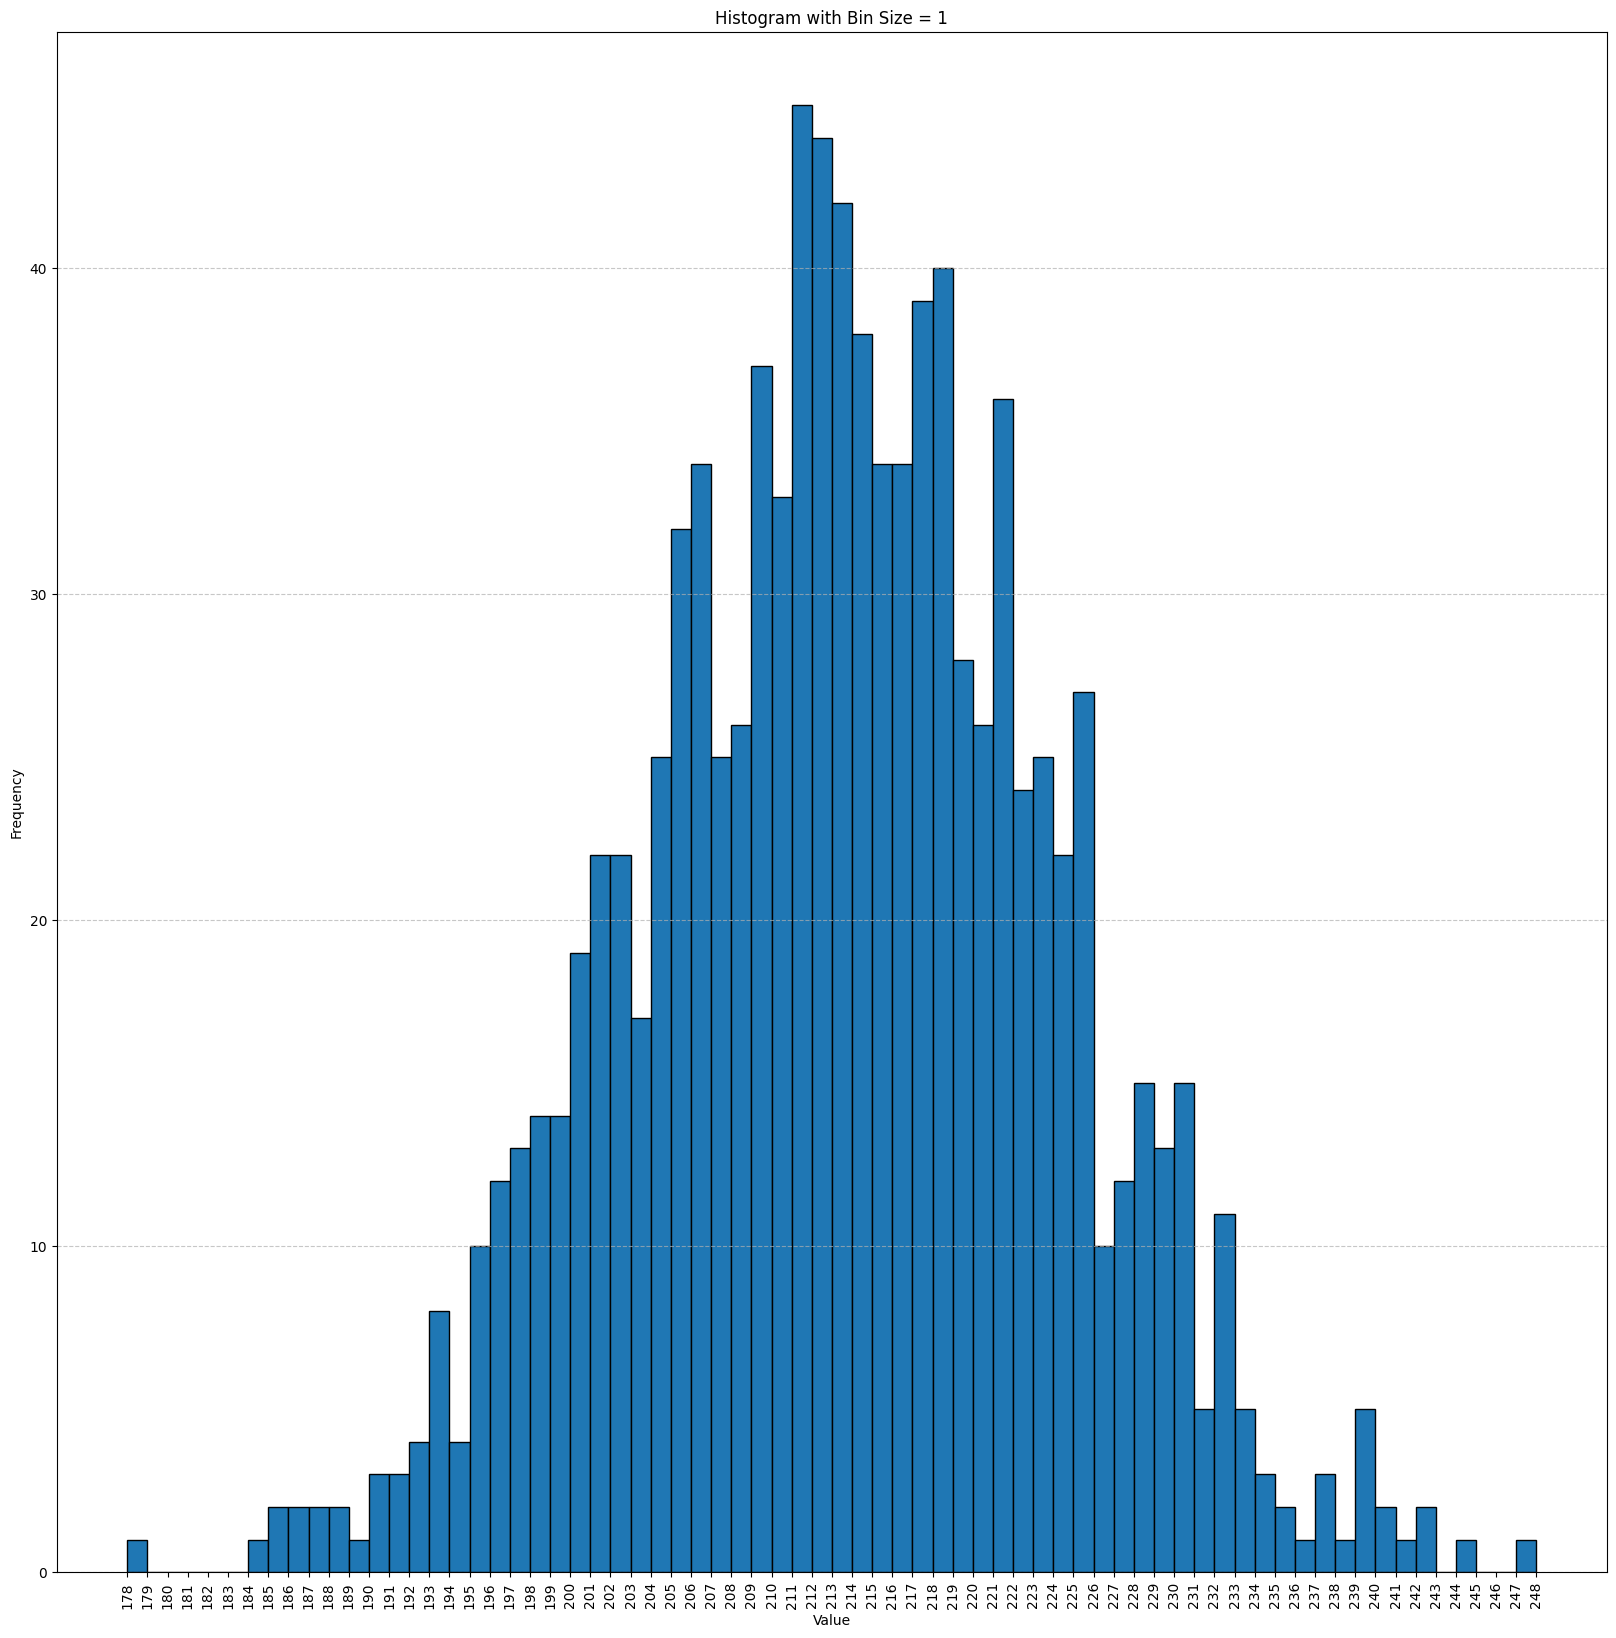

In [14]:
import matplotlib.pyplot as plt

# Sample data
data = intersecting_genes_length_list

# Define bins with size = 1
min_bin = min(data)
max_bin = max(data)
bins = range(min_bin, max_bin + 2)  # +2 to include the last value properly

# Plot
plt.figure(figsize=(20, 20))
plt.hist(data, bins=bins, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Bin Size = 1')
plt.xticks(bins)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
# Always show details
import scipy.stats as stats

# Updated list of observations
observations = intersecting_genes_length_list
# print(value_of_interest)
# [7, 7, 4, 7, 10, 2, 7, 10, 5, 10, 1, 0, 5, 4, 6, 7, 6, 9, 5, 1, 8, 7, 2, 10, 7, 9, 3, 11, 9, 0, 9, 5, 5, 2, 0, 12, 3, 6, 4, 2, 9, 5, 3, 2, 8, 2, 0, 6, 6, 1, 12, 3, 1, 3, 8, 12, 8, 0, 6, 4, 0, 7, 2, 7, 10, 2, 7, 3, 3, 1, 13, 8, 11, 8, 1, 6, 3, 0, 6, 5, 7, 2, 2, 7, 0, 11, 7, 9, 10, 8, 2, 4, 8, 7, 0, 3, 5, 0, 4, 8, 6, 4, 8, 1, 3, 5, 6, 6, 6, 0, 4, 6, 4, 2, 4, 4, 5, 10, 10, 0, 5, 3, 1, 7, 5, 2, 0, 0, 3, 0, 7, 8, 10, 6, 3, 4, 2, 8, 8, 0, 7, 5, 0, 7, 6, 5, 1, 0, 9, 7, 1, 13, 2, 10, 3, 9, 9, 5, 1, 5, 6, 7, 1, 2, 10, 8, 7, 1, 7, 6, 9, 5, 0, 11, 0, 0, 6, 2, 1, 1, 1, 6, 4, 9, 8, 4, 5, 9, 4, 15, 9, 0, 2, 0, 1, 3, 10, 3, 9, 3, 4, 2, 1, 7, 4, 1, 1, 5, 3, 4, 14, 0, 0, 5, 5, 8, 7, 0]

# Calculate the proportion of values greater than or equal to 10
value_of_interest = final_gene_count
print(value_of_interest)
count_extreme = sum(x >= value_of_interest for x in observations)
print(count_extreme)
p_value = count_extreme / len(observations)

p_value

244
2


0.002

In [17]:
output = "Count"
for count in intersecting_genes_length_list:
    output += f"\n{count}"
with open(f"/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/7.Manhatten/1.Density_plots_5/pararge_density_plot_x_{final_gene_count}_p_{p_value}.csv", 'w') as out_file:
    out_file.write(output)

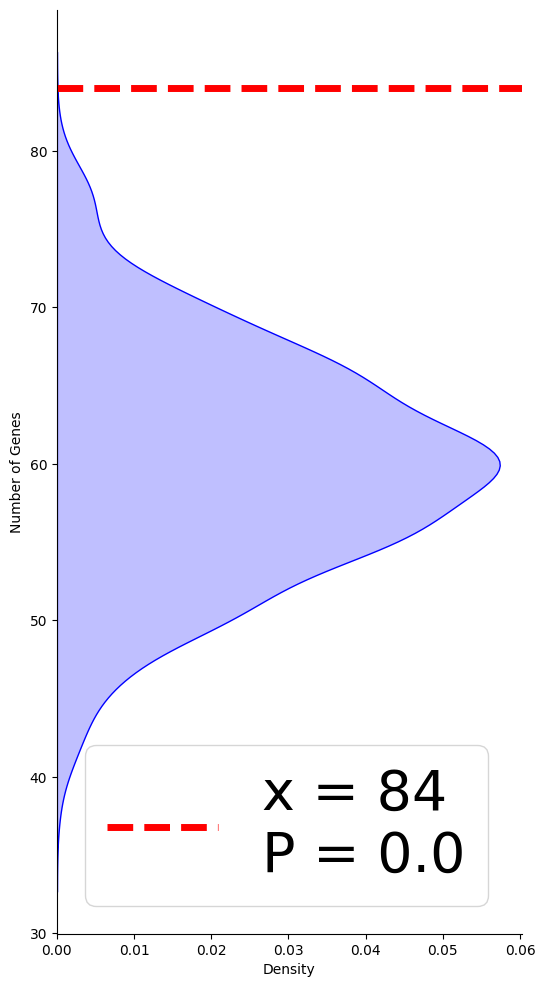

In [33]:
import seaborn as sns
plt.figure(figsize=(6, 12))
sns.kdeplot(y=data, fill=True, linewidth=1, color="blue")

# Vertical line at defined place (example: x=10)
defined_value = value_of_interest
plt.axhline(defined_value, color='red', linestyle='--', linewidth=5, label=f"x = {defined_value}\nP = {p_value}")
sns.despine(top=True, right=True)
plt.ylabel("Number of Genes")
plt.xlabel("Density")
# plt.title("Smooth Density Plot with Vertical Line")
plt.legend(fontsize=40)
# plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.savefig("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/7.Manhatten/2.Density_plot_1%/pararge_density_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()